In [55]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
import pandas as pd
import Risk_Kit as rk

## Loading and cleaning Indices Data

In [3]:
returns=pd.read_csv("Portfolios_Formed_on_ME_monthly_EW.csv",index_col=0,header=0,na_values=-99.99,parse_dates=True)
returns.head()

C:\Users\chris\AppData\Local\Temp\ipykernel_11532\835172555.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  returns=pd.read_csv("Portfolios_Formed_on_ME_monthly_EW.csv",index_col=0,header=0,na_values=-99.99,parse_dates=True)


,<= 0,Lo 30,Med 40,Hi 30,Lo 20,Qnt 2,Qnt 3,Qnt 4,Hi 20,Lo 10,Dec 2,Dec 3,Dec 4,Dec 5,Dec 6,Dec 7,Dec 8,Dec 9,Hi 10
192607,NaN,-0.4300,1.5200,2.6800,-0.5700,0.5900,1.6000,1.4700,3.3300,-1.4500,0.2900,-0.1500,1.3300,1.2400,1.9800,1.5500,1.3800,3.3800,3.2900
192608,NaN,3.9000,3.0400,2.0900,3.8400,3.5900,3.7100,1.6100,2.3300,5.1200,2.5900,4.0300,3.1500,2.7200,4.7200,1.6000,1.6300,0.9800,3.7000
192609,NaN,-1.0800,-0.5400,0.1600,-0.4800,-1.4000,0.0000,-0.5000,-0.0900,0.9300,-1.8700,-2.2700,-0.5300,0.0700,-0.0700,-1.6400,0.6400,-0.8600,0.6700
192610,NaN,-3.3200,-3.5200,-3.0600,-3.2900,-4.1000,-2.8900,-3.3600,-2.9500,-4.8400,-1.7700,-3.3600,-4.8300,-2.9800,-2.8000,-3.4500,-3.2700,-3.4700,-2.4300
192611,NaN,-0.4600,3.8200,3.0900,-0.5500,2.1800,3.4100,3.3900,3.1600,-0.7800,-0.3200,-0.2900,4.6500,3.2400,3.5700,3.8200,2.9500,3.6100,2.7000


In [4]:
returns.index

Index([192607, 192608, 192609, 192610, 192611, 192612, 192701, 192702, 192703,
       192704,
       ...
       201803, 201804, 201805, 201806, 201807, 201808, 201809, 201810, 201811,
       201812],
      dtype='int64', length=1110)

### Conversion to Timeseries

In [5]:
returns.index=pd.to_datetime(returns.index,format="%Y%m")
returns.index=returns.index.to_period("M")
returns.head()

,<= 0,Lo 30,Med 40,Hi 30,Lo 20,Qnt 2,Qnt 3,Qnt 4,Hi 20,Lo 10,Dec 2,Dec 3,Dec 4,Dec 5,Dec 6,Dec 7,Dec 8,Dec 9,Hi 10
1926-07,NaN,-0.4300,1.5200,2.6800,-0.5700,0.5900,1.6000,1.4700,3.3300,-1.4500,0.2900,-0.1500,1.3300,1.2400,1.9800,1.5500,1.3800,3.3800,3.2900
1926-08,NaN,3.9000,3.0400,2.0900,3.8400,3.5900,3.7100,1.6100,2.3300,5.1200,2.5900,4.0300,3.1500,2.7200,4.7200,1.6000,1.6300,0.9800,3.7000
1926-09,NaN,-1.0800,-0.5400,0.1600,-0.4800,-1.4000,0.0000,-0.5000,-0.0900,0.9300,-1.8700,-2.2700,-0.5300,0.0700,-0.0700,-1.6400,0.6400,-0.8600,0.6700
1926-10,NaN,-3.3200,-3.5200,-3.0600,-3.2900,-4.1000,-2.8900,-3.3600,-2.9500,-4.8400,-1.7700,-3.3600,-4.8300,-2.9800,-2.8000,-3.4500,-3.2700,-3.4700,-2.4300
1926-11,NaN,-0.4600,3.8200,3.0900,-0.5500,2.1800,3.4100,3.3900,3.1600,-0.7800,-0.3200,-0.2900,4.6500,3.2400,3.5700,3.8200,2.9500,3.6100,2.7000


In [6]:
returns.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 1110 entries, 1926-07 to 2018-12
Freq: M
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   <= 0    0 non-null      float64
 1   Lo 30   1110 non-null   float64
 2   Med 40  1110 non-null   float64
 3   Hi 30   1110 non-null   float64
 4   Lo 20   1110 non-null   float64
 5   Qnt 2   1110 non-null   float64
 6   Qnt 3   1110 non-null   float64
 7   Qnt 4   1110 non-null   float64
 8   Hi 20   1110 non-null   float64
 9   Lo 10   1110 non-null   float64
 10  Dec 2   1110 non-null   float64
 11  Dec 3   1110 non-null   float64
 12  Dec 4   1110 non-null   float64
 13  Dec 5   1110 non-null   float64
 14  Dec 6   1110 non-null   float64
 15  Dec 7   1110 non-null   float64
 16  Dec 8   1110 non-null   float64
 17  Dec 9   1110 non-null   float64
 18  Hi 10   1110 non-null   float64
dtypes: float64(19)
memory usage: 173.4 KB


### Dealing with missing values

In [7]:
returns.drop(returns.columns[0],axis=1,inplace=True)

In [8]:
returns.rename(columns={"Lo 10":"SmallCap","Hi 10":"LargeCap"},inplace=True)

In [9]:
returns.head()

,Lo 30,Med 40,Hi 30,Lo 20,Qnt 2,Qnt 3,Qnt 4,Hi 20,SmallCap,Dec 2,Dec 3,Dec 4,Dec 5,Dec 6,Dec 7,Dec 8,Dec 9,LargeCap
1926-07,-0.4300,1.5200,2.6800,-0.5700,0.5900,1.6000,1.4700,3.3300,-1.4500,0.2900,-0.1500,1.3300,1.2400,1.9800,1.5500,1.3800,3.3800,3.2900
1926-08,3.9000,3.0400,2.0900,3.8400,3.5900,3.7100,1.6100,2.3300,5.1200,2.5900,4.0300,3.1500,2.7200,4.7200,1.6000,1.6300,0.9800,3.7000
1926-09,-1.0800,-0.5400,0.1600,-0.4800,-1.4000,0.0000,-0.5000,-0.0900,0.9300,-1.8700,-2.2700,-0.5300,0.0700,-0.0700,-1.6400,0.6400,-0.8600,0.6700
1926-10,-3.3200,-3.5200,-3.0600,-3.2900,-4.1000,-2.8900,-3.3600,-2.9500,-4.8400,-1.7700,-3.3600,-4.8300,-2.9800,-2.8000,-3.4500,-3.2700,-3.4700,-2.4300
1926-11,-0.4600,3.8200,3.0900,-0.5500,2.1800,3.4100,3.3900,3.1600,-0.7800,-0.3200,-0.2900,4.6500,3.2400,3.5700,3.8200,2.9500,3.6100,2.7000


In [10]:
returns=returns/100

In [11]:
returns.head()

,Lo 30,Med 40,Hi 30,Lo 20,Qnt 2,Qnt 3,Qnt 4,Hi 20,SmallCap,Dec 2,Dec 3,Dec 4,Dec 5,Dec 6,Dec 7,Dec 8,Dec 9,LargeCap
1926-07,-0.0043,0.0152,0.0268,-0.0057,0.0059,0.0160,0.0147,0.0333,-0.0145,0.0029,-0.0015,0.0133,0.0124,0.0198,0.0155,0.0138,0.0338,0.0329
1926-08,0.0390,0.0304,0.0209,0.0384,0.0359,0.0371,0.0161,0.0233,0.0512,0.0259,0.0403,0.0315,0.0272,0.0472,0.0160,0.0163,0.0098,0.0370
1926-09,-0.0108,-0.0054,0.0016,-0.0048,-0.0140,0.0000,-0.0050,-0.0009,0.0093,-0.0187,-0.0227,-0.0053,0.0007,-0.0007,-0.0164,0.0064,-0.0086,0.0067
1926-10,-0.0332,-0.0352,-0.0306,-0.0329,-0.0410,-0.0289,-0.0336,-0.0295,-0.0484,-0.0177,-0.0336,-0.0483,-0.0298,-0.0280,-0.0345,-0.0327,-0.0347,-0.0243
1926-11,-0.0046,0.0382,0.0309,-0.0055,0.0218,0.0341,0.0339,0.0316,-0.0078,-0.0032,-0.0029,0.0465,0.0324,0.0357,0.0382,0.0295,0.0361,0.0270


## Generalized Statistical view

In [12]:
returns.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Lo 30,1110.0000,0.0150,0.0912,-0.3099,-0.0256,0.0126,0.0472,1.0037
Med 40,1110.0000,0.0115,0.0707,-0.3099,-0.0204,0.0146,0.0465,0.5840
Hi 30,1110.0000,0.0098,0.0582,-0.3051,-0.0198,0.0131,0.0396,0.4424
Lo 20,1110.0000,0.0159,0.0972,-0.3099,-0.0270,0.0119,0.0483,1.1260
Qnt 2,1110.0000,0.0124,0.0793,-0.3147,-0.0239,0.0147,0.0472,0.8164
Qnt 3,1110.0000,0.0116,0.0705,-0.3213,-0.0217,0.0151,0.0477,0.5653
Qnt 4,1110.0000,0.0107,0.0639,-0.2931,-0.0201,0.0146,0.0434,0.5064
Hi 20,1110.0000,0.0094,0.0563,-0.3040,-0.0192,0.0123,0.0384,0.4163
SmallCap,1110.0000,0.0176,0.1063,-0.2914,-0.0273,0.0105,0.0499,1.3429
Dec 2,1110.0000,0.0134,0.0912,-0.3302,-0.0273,0.0118,0.0503,1.0616


## Calculating Sharpe Ratio

In [13]:
rk.sharpe_ratio(returns)

,Annualized Returns,Annualized Volatility,Sharpe Ratio
Lo 30,0.1442,0.3160,0.3615
Med 40,0.1148,0.2448,0.3464
Hi 30,0.1023,0.2015,0.3588
Lo 20,0.1520,0.3367,0.3623
Qnt 2,0.1197,0.2747,0.3267
Qnt 3,0.1156,0.2442,0.3506
Qnt 4,0.1095,0.2215,0.3589
Hi 20,0.0985,0.1951,0.3510
SmallCap,0.1675,0.3682,0.3733
Dec 2,0.1225,0.3158,0.2928


## Calculating Max Drawdowns

In [14]:
LCap=rk.drawdowns(returns["LargeCap"],1000)
LCap

,Wealth Index,Last Peak,Drawdown
1926-07,1032.9000,1032.9000,0.0000
1926-08,1071.1173,1071.1173,0.0000
1926-09,1078.2938,1078.2938,0.0000
1926-10,1052.0912,1078.2938,-0.0243
1926-11,1080.4977,1080.4977,0.0000
...,...,...,...
2018-08,4175915.1461,4175915.1461,0.0000
2018-09,4212245.6079,4212245.6079,0.0000
2018-10,3935501.0714,4212245.6079,-0.0657
2018-11,4035069.2485,4212245.6079,-0.0421


## Plotting Different measures

### Plottingg Wealth Index

<Axes: >

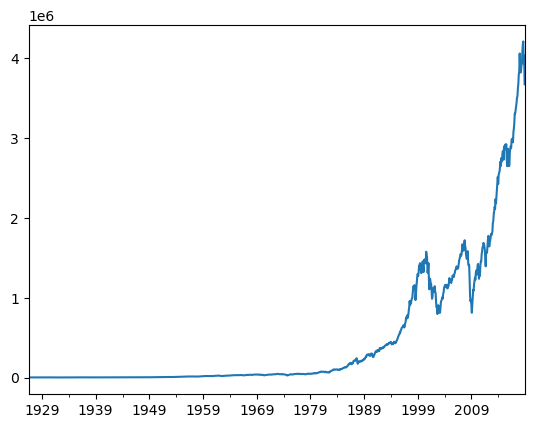

In [15]:
LCap["Wealth Index"].plot.line()

### Plotting Peaks

<Axes: >

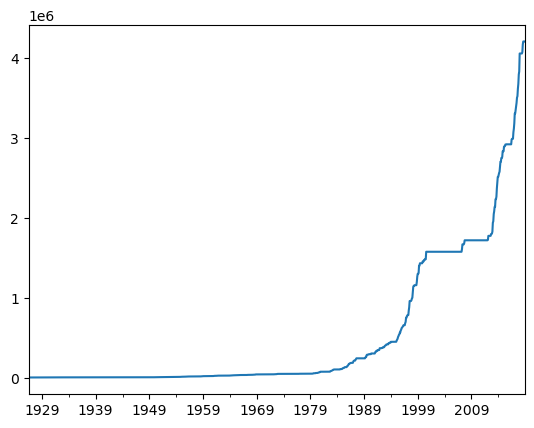

In [16]:
LCap["Last Peak"].plot.line()

### Plotting normalized drawdowns

<Axes: >

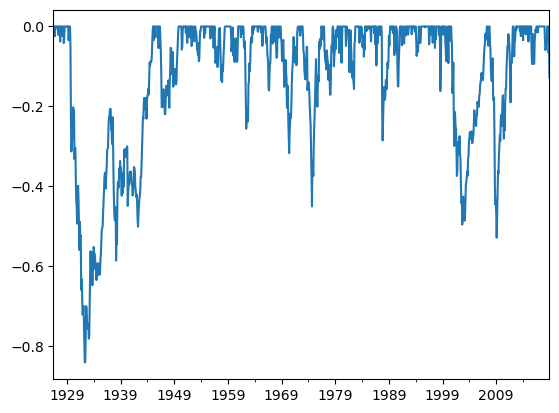

In [17]:
LCap["Drawdown"].plot.line()

In [18]:
LCap["Drawdown"].min()

-0.8400375277943123

In [19]:
LCap["Drawdown"].idxmin()

Period('1932-05', 'M')

## Deviation from Normality and other statistical measures

In [20]:
pd.concat([returns.mean(),returns.median(),returns.mean()>returns.median()],axis=1)

,0,1,2
Lo 30,0.0150,0.0126,True
Med 40,0.0115,0.0146,False
Hi 30,0.0098,0.0131,False
Lo 20,0.0159,0.0119,True
Qnt 2,0.0124,0.0147,False
Qnt 3,0.0116,0.0151,False
Qnt 4,0.0107,0.0146,False
Hi 20,0.0094,0.0123,False
SmallCap,0.0176,0.0105,True
Dec 2,0.0134,0.0118,True


### Measuring Skewness and kurtosis by manually created methods alternatively we could have used scipy stats

### Calculating Skewness

In [21]:
rk.magic_moments(returns,moment=3)

Lo 30      3.0868
Med 40     1.1153
Hi 30      0.4564
Lo 20      3.6298
Qnt 2      1.9291
Qnt 3      0.9556
Qnt 4      0.6829
Hi 20      0.3455
SmallCap   4.4107
Dec 2      2.8404
Dec 3      1.9519
Dec 4      1.8798
Dec 5      0.9186
Dec 6      1.0356
Dec 7      0.7407
Dec 8      0.6724
Dec 9      0.4603
LargeCap   0.2334
dtype: float64

### Measuring Kurtosis

In [22]:
rk.magic_moments(returns,moment=4)

Lo 30      32.7451
Med 40     15.4676
Hi 30      12.3240
Lo 20      38.2854
Qnt 2      22.6732
Qnt 3      14.2197
Qnt 4      12.7896
Hi 20      11.8472
SmallCap   46.8450
Dec 2      31.5081
Dec 3      22.5407
Dec 4      22.4282
Dec 5      13.8685
Dec 6      15.0133
Dec 7      12.9539
Dec 8      13.0747
Dec 9      12.8332
LargeCap   10.6947
dtype: float64

### We can always use scipy.stats like below

In [23]:
import scipy

### Calculating Skewness

In [24]:
scipy.stats.skew(returns)

array([3.08675596, 1.11532118, 0.45642335, 3.62982892, 1.92908896,
       0.95563123, 0.68289656, 0.34547179, 4.41073861, 2.84043943,
       1.95186513, 1.87975085, 0.91859281, 1.0356326 , 0.74074667,
       0.67243623, 0.46034969, 0.23344522])

### Calculating Kurtosis

In [25]:
scipy.stats.kurtosis(returns)

array([29.74514717, 12.4676203 ,  9.32399138, 35.28541416, 19.67317381,
       11.21965362,  9.78957022,  8.84724321, 43.84500784, 28.5081241 ,
       19.54067929, 19.42820563, 10.86848962, 12.01327489,  9.95394656,
       10.07468675,  9.83321707,  7.69465394])

### Testing for random normal distribution

In [26]:
import numpy as np

In [27]:
norm_returns=np.random.normal(0.15,size=(returns.shape[0],1))

In [28]:
norm_returns

array([[ 0.0289602 ],
       [-0.58765397],
       [-0.34779984],
       ...,
       [ 1.84606492],
       [-0.60587767],
       [-0.42443423]])

### Skewness of normal returns

In [29]:
rk.magic_moments(norm_returns,3)

0.024716647074046368

### Kurtosis of normal returns

In [30]:
rk.magic_moments(norm_returns,4)

2.854922932441201

### Applying jarque-bera test to determine whether it's normal or not

In [31]:
import scipy.stats

### Though p-value is low still we can say it is pretty good for a small size distribution if we think it as normal

In [32]:
scipy.stats.jarque_bera(norm_returns)

SignificanceResult(statistic=1.0864590322078906, pvalue=0.5808692932059407)

### Applying jarque-bera test to our indices returns

In [33]:
returns.aggregate(rk.is_normal)

Lo 30       False
Med 40      False
Hi 30       False
Lo 20       False
Qnt 2       False
Qnt 3       False
Qnt 4       False
Hi 20       False
SmallCap    False
Dec 2       False
Dec 3       False
Dec 4       False
Dec 5       False
Dec 6       False
Dec 7       False
Dec 8       False
Dec 9       False
LargeCap    False
dtype: bool

# Analysing the Hedge Fund Dataset

In [34]:
hfi=pd.read_csv("edhec-hedgefundindices.csv",header=0,index_col=0,parse_dates=True)
hfi.index=hfi.index.to_period("M")
hfi=hfi/100
hfi.head()

C:\Users\chris\AppData\Local\Temp\ipykernel_11532\973434481.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  hfi=pd.read_csv("edhec-hedgefundindices.csv",header=0,index_col=0,parse_dates=True)


,Convertible Arbitrage,CTA Global,Distressed Securities,Emerging Markets,Equity Market Neutral,Event Driven,Fixed Income Arbitrage,Global Macro,Long/Short Equity,Merger Arbitrage,Relative Value,Short Selling,Funds Of Funds
date,,,,,,,,,,,,,
1997-01,0.0119,0.0393,0.0178,0.0791,0.0189,0.0213,0.0191,0.0573,0.0281,0.0150,0.0180,-0.0166,0.0317
1997-02,0.0123,0.0298,0.0122,0.0525,0.0101,0.0084,0.0122,0.0175,-0.0006,0.0034,0.0118,0.0426,0.0106
1997-03,0.0078,-0.0021,-0.0012,-0.0120,0.0016,-0.0023,0.0109,-0.0119,-0.0084,0.0060,0.0010,0.0778,-0.0077
1997-04,0.0086,-0.0170,0.0030,0.0119,0.0119,-0.0005,0.0130,0.0172,0.0084,-0.0001,0.0122,-0.0129,0.0009
1997-05,0.0156,-0.0015,0.0233,0.0315,0.0189,0.0346,0.0118,0.0108,0.0394,0.0197,0.0173,-0.0737,0.0275


In [35]:
hfi.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Convertible Arbitrage,263.0000,0.0055,0.0166,-0.1237,-0.0002,0.0065,0.0136,0.0611
CTA Global,263.0000,0.0041,0.0233,-0.0568,-0.0120,0.0014,0.0198,0.0691
Distressed Securities,263.0000,0.0069,0.0170,-0.0836,-0.0015,0.0089,0.0178,0.0504
Emerging Markets,263.0000,0.0063,0.0325,-0.1922,-0.0097,0.0096,0.0257,0.1230
Equity Market Neutral,263.0000,0.0045,0.0081,-0.0587,0.0015,0.0051,0.0083,0.0253
Event Driven,263.0000,0.0063,0.0167,-0.0886,-0.0015,0.0084,0.0162,0.0442
Fixed Income Arbitrage,263.0000,0.0044,0.0115,-0.0867,0.0016,0.0055,0.0095,0.0365
Global Macro,263.0000,0.0054,0.0147,-0.0313,-0.0040,0.0038,0.0124,0.0738
Long/Short Equity,263.0000,0.0063,0.0199,-0.0675,-0.0047,0.0079,0.0192,0.0745
Merger Arbitrage,263.0000,0.0054,0.0096,-0.0544,0.0006,0.0060,0.0111,0.0272


In [36]:
pd.concat([hfi.mean(),hfi.median(),hfi.mean()>hfi.median()],axis=1)

,0,1,2
Convertible Arbitrage,0.0055,0.0065,False
CTA Global,0.0041,0.0014,True
Distressed Securities,0.0069,0.0089,False
Emerging Markets,0.0063,0.0096,False
Equity Market Neutral,0.0045,0.0051,False
Event Driven,0.0063,0.0084,False
Fixed Income Arbitrage,0.0044,0.0055,False
Global Macro,0.0054,0.0038,True
Long/Short Equity,0.0063,0.0079,False
Merger Arbitrage,0.0054,0.0060,False


### Calculating Sharpe Ratio

In [37]:
rk.sharpe_ratio(hfi)

,Annualized Returns,Annualized Volatility,Sharpe Ratio
Convertible Arbitrage,0.0664,0.0574,0.6334
CTA Global,0.0466,0.0808,0.2056
Distressed Securities,0.0847,0.0590,0.9270
Emerging Markets,0.0708,0.1127,0.3616
Equity Market Neutral,0.0549,0.0282,0.8846
Event Driven,0.0770,0.0580,0.8109
Fixed Income Arbitrage,0.0528,0.0400,0.5704
Global Macro,0.0654,0.0510,0.6950
Long/Short Equity,0.0761,0.0691,0.6680
Merger Arbitrage,0.0656,0.0333,1.0687


### Calculating Drawdowns over period

In [38]:
CTA_Glob=rk.drawdowns(hfi["CTA Global"])
CTA_Glob

,Wealth Index,Last Peak,Drawdown
date,,,
1997-01,1039.3000,1039.3000,0.0000
1997-02,1070.2711,1070.2711,0.0000
1997-03,1068.0236,1070.2711,-0.0021
1997-04,1049.8672,1070.2711,-0.0191
1997-05,1048.2924,1070.2711,-0.0205
...,...,...,...
2018-07,2786.4664,3059.0811,-0.0891
2018-08,2832.7218,3059.0811,-0.0740
2018-09,2817.4251,3059.0811,-0.0790


In [39]:
CTA_Glob["Drawdown"].min()

-0.1255794426646723

In [40]:
CTA_Glob["Drawdown"].idxmin()

Period('2013-09', 'M')

### Plotting these measures

<Axes: xlabel='date'>

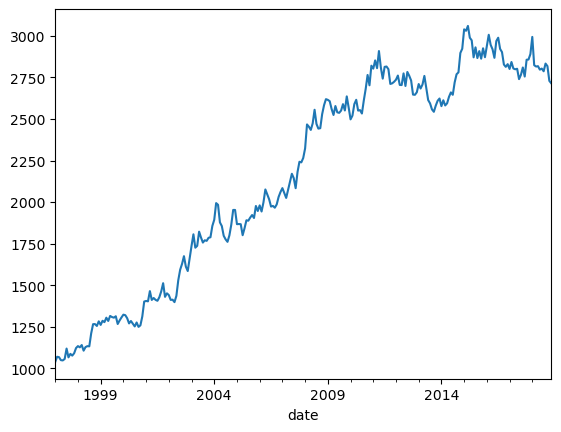

In [41]:
CTA_Glob["Wealth Index"].plot.line()

<Axes: xlabel='date'>

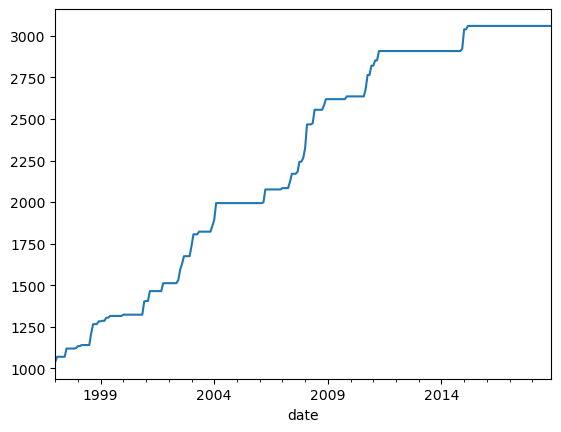

In [42]:
CTA_Glob["Last Peak"].plot.line()

<Axes: xlabel='date'>

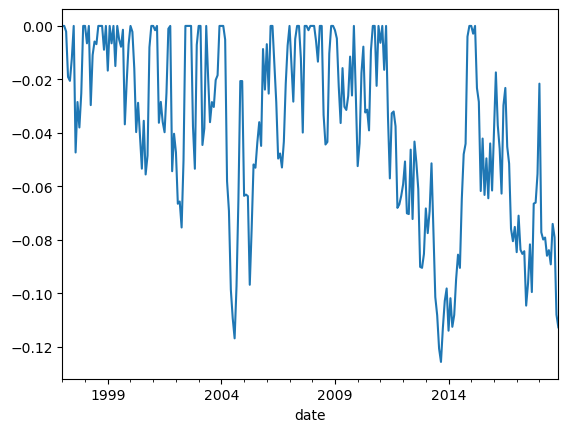

In [43]:
CTA_Glob["Drawdown"].plot.line()

### Calculating Skewness

In [44]:
rk.magic_moments(hfi,moment=3).sort_values()

Fixed Income Arbitrage   -3.9403
Convertible Arbitrage    -2.6396
Equity Market Neutral    -2.1244
Relative Value           -1.8155
Event Driven             -1.4092
Merger Arbitrage         -1.3201
Distressed Securities    -1.3008
Emerging Markets         -1.1671
Long/Short Equity        -0.3902
Funds Of Funds           -0.3618
CTA Global                0.1737
Short Selling             0.7680
Global Macro              0.9829
dtype: float64

In [45]:
scipy.stats.skew(hfi)

array([-2.63959223,  0.17369864, -1.30084204, -1.16706749, -2.12443538,
       -1.40915356, -3.94032029,  0.98292188, -0.39022677, -1.32008333,
       -1.81546975,  0.76797484, -0.36178308])

### Measuring Kurtosis

In [46]:
rk.magic_moments(hfi,moment=4).sort_values()

CTA Global                2.9530
Long/Short Equity         4.5239
Global Macro              5.7417
Short Selling             6.1178
Funds Of Funds            7.0702
Distressed Securities     7.8900
Event Driven              8.0358
Merger Arbitrage          8.7389
Emerging Markets          9.2508
Relative Value           12.1212
Equity Market Neutral    17.2186
Convertible Arbitrage    23.2808
Fixed Income Arbitrage   29.8422
dtype: float64

In [47]:
scipy.stats.kurtosis(hfi)

array([20.28083446, -0.04703963,  4.88998336,  6.25078841, 14.21855526,
        5.03582817, 26.84219928,  2.74167945,  1.52389258,  5.73894979,
        9.12120787,  3.11777175,  4.07015278])

### Applying jarque-bera test

In [48]:
hfi.aggregate(rk.is_normal,level=0.05)

Convertible Arbitrage     False
CTA Global                 True
Distressed Securities     False
Emerging Markets          False
Equity Market Neutral     False
Event Driven              False
Fixed Income Arbitrage    False
Global Macro              False
Long/Short Equity         False
Merger Arbitrage          False
Relative Value            False
Short Selling             False
Funds Of Funds            False
dtype: bool

### Since we are only worried about the volatility caused by negative returns

In [51]:
rk.semi_deviation(hfi)

Convertible Arbitrage    0.0195
CTA Global               0.0124
Distressed Securities    0.0152
Emerging Markets         0.0280
Equity Market Neutral    0.0096
Event Driven             0.0154
Fixed Income Arbitrage   0.0178
Global Macro             0.0066
Long/Short Equity        0.0141
Merger Arbitrage         0.0089
Relative Value           0.0122
Short Selling            0.0273
Funds Of Funds           0.0121
dtype: float64

## Estimating different Value and Risk Measures VaR and CVaR

### VaR based on historical sample data

In [58]:
rk.var_historic(hfi)

Convertible Arbitrage    0.0158
CTA Global               0.0317
Distressed Securities    0.0197
Emerging Markets         0.0425
Equity Market Neutral    0.0081
Event Driven             0.0253
Fixed Income Arbitrage   0.0079
Global Macro             0.0150
Long/Short Equity        0.0260
Merger Arbitrage         0.0105
Relative Value           0.0117
Short Selling            0.0678
Funds Of Funds           0.0205
dtype: float64

### VaR based on Gaussian Distribution assumption

In [62]:
rk.var_assumption(hfi)

Convertible Arbitrage    0.0217
CTA Global               0.0342
Distressed Securities    0.0210
Emerging Markets         0.0472
Equity Market Neutral    0.0088
Event Driven             0.0211
Fixed Income Arbitrage   0.0146
Global Macro             0.0188
Long/Short Equity        0.0264
Merger Arbitrage         0.0104
Relative Value           0.0131
Short Selling            0.0801
Funds Of Funds           0.0213
dtype: float64

### VaR based on non Gaussian Distribution assumption, cornish-fisher method

In [65]:
rk.var_assumption(hfi,5,modified=True)

Convertible Arbitrage    0.0252
CTA Global               0.0331
Distressed Securities    0.0251
Emerging Markets         0.0530
Equity Market Neutral    0.0107
Event Driven             0.0255
Fixed Income Arbitrage   0.0179
Global Macro             0.0136
Long/Short Equity        0.0279
Merger Arbitrage         0.0126
Relative Value           0.0162
Short Selling            0.0662
Funds Of Funds           0.0216
dtype: float64

### Plotting different VaR

In [71]:
ls=[rk.var_assumption(hfi),rk.var_assumption(hfi,modified=True),rk.var_historic(hfi)]
comp=pd.concat(ls,axis=1)
comp.columns=["Gaussian VaR","Cornish-Fisher","Historic VaR"]
comp

,Gaussian VaR,Cornish-Fisher,Historic VaR
Convertible Arbitrage,0.0217,0.0252,0.0158
CTA Global,0.0342,0.0331,0.0317
Distressed Securities,0.0210,0.0251,0.0197
Emerging Markets,0.0472,0.0530,0.0425
Equity Market Neutral,0.0088,0.0107,0.0081
Event Driven,0.0211,0.0255,0.0253
Fixed Income Arbitrage,0.0146,0.0179,0.0079
Global Macro,0.0188,0.0136,0.0150
Long/Short Equity,0.0264,0.0279,0.0260
Merger Arbitrage,0.0104,0.0126,0.0105


<Axes: >

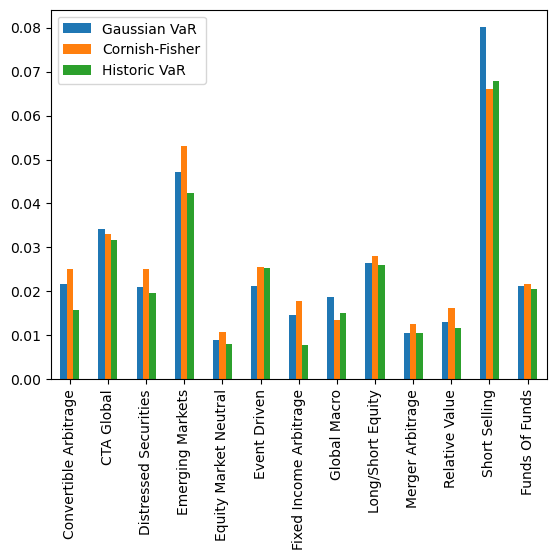

In [72]:
comp.plot.bar()

### Estimating CVaR

In [76]:
rk.historic_cvar(hfi)

Convertible Arbitrage    -0.0365
CTA Global               -0.0413
Distressed Securities    -0.0364
Emerging Markets         -0.0724
Equity Market Neutral    -0.0169
Event Driven             -0.0383
Fixed Income Arbitrage   -0.0283
Global Macro             -0.0206
Long/Short Equity        -0.0419
Merger Arbitrage         -0.0191
Relative Value           -0.0246
Short Selling            -0.0968
Funds Of Funds           -0.0332
dtype: float64